#Setup inicial


importar bibliotecas

In [56]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import f1_score, recall_score, roc_auc_score


Configurações visuais


In [ ]:
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

# Exploração e entendimento do dataset (EDA)

Carregar dados

In [57]:
df = pd.read_csv("Telco_customer_churn.csv", sep=";")
df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783","33,964131","-118,272783",Male,...,Month-to-month,Yes,Mailed check,"53,85","108,15",Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742","34,059281","-118,307420",Female,...,Month-to-month,Yes,Electronic check,"70,7","151,65",Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953","34,048013","-118,293953",Female,...,Month-to-month,Yes,Electronic check,"99,65","820,5",Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709","34,062125","-118,315709",Female,...,Month-to-month,Yes,Electronic check,"104,8","3046,05",Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293","34,039224","-118,266293",Male,...,Month-to-month,Yes,Bank transfer (automatic),"103,7","5036,3",Yes,1,89,5340,Competitor had better devices


Informações gerais

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         7043 non-null   object
 1   Count              7043 non-null   int64 
 2   Country            7043 non-null   object
 3   State              7043 non-null   object
 4   City               7043 non-null   object
 5   Zip Code           7043 non-null   int64 
 6   Lat Long           7043 non-null   object
 7   Latitude           7043 non-null   object
 8   Longitude          7043 non-null   object
 9   Gender             7043 non-null   object
 10  Senior Citizen     7043 non-null   object
 11  Partner            7043 non-null   object
 12  Dependents         7043 non-null   object
 13  Tenure Months      7043 non-null   int64 
 14  Phone Service      7043 non-null   object
 15  Multiple Lines     7043 non-null   object
 16  Internet Service   7043 non-null   object


Estatísticas descritivas

In [ ]:
df.describe()


,Count,Zip Code,Tenure Months,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,32.371149,0.265370,58.699418,4400.295755
std,0.0,1865.794555,24.559481,0.441561,21.525131,1183.057152
min,1.0,90001.000000,0.000000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,9.000000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,29.000000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,55.000000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,72.000000,1.000000,100.000000,6500.000000


Distribuição do churn

In [ ]:
df["Churn Value"].value_counts(normalize=True)

,proportion
Churn Value,
0,0.73463
1,0.26537


Gráfico do churn

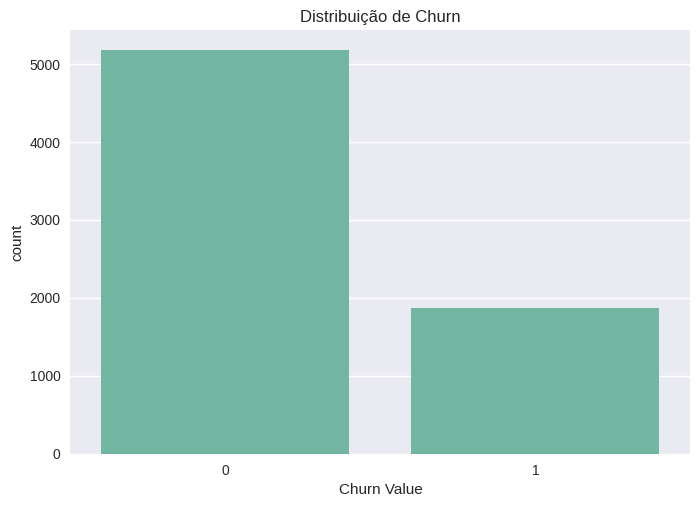

In [58]:
sns.countplot(x="Churn Value", data=df)
plt.title("Distribuição de Churn")
plt.show()


Separar tipos

In [ ]:
cat_cols = df.select_dtypes(include="object").columns
num_cols = df.select_dtypes(exclude="object").columns

cat_cols, num_cols


(Index(['CustomerID', 'Country', 'State', 'City', 'Lat Long', 'Latitude',
        'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
        'Phone Service', 'Multiple Lines', 'Internet Service',
        'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
        'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
        'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
        'Churn Reason'],
       dtype='object'),
 Index(['Count', 'Zip Code', 'Tenure Months', 'Churn Value', 'Churn Score',
        'CLTV'],
       dtype='object'))

Churn vs Contrato

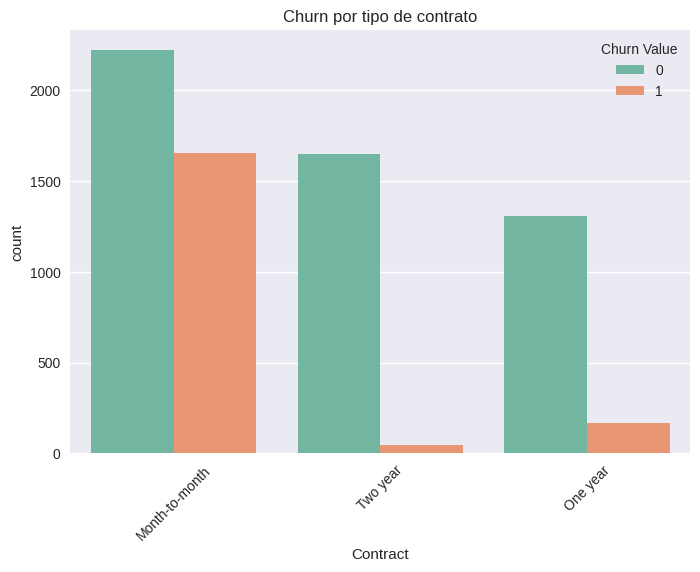

In [59]:
sns.countplot(x="Contract", hue="Churn Value", data=df)
plt.xticks(rotation=45)
plt.title("Churn por tipo de contrato")
plt.show()


Churn vs Monthly Charges

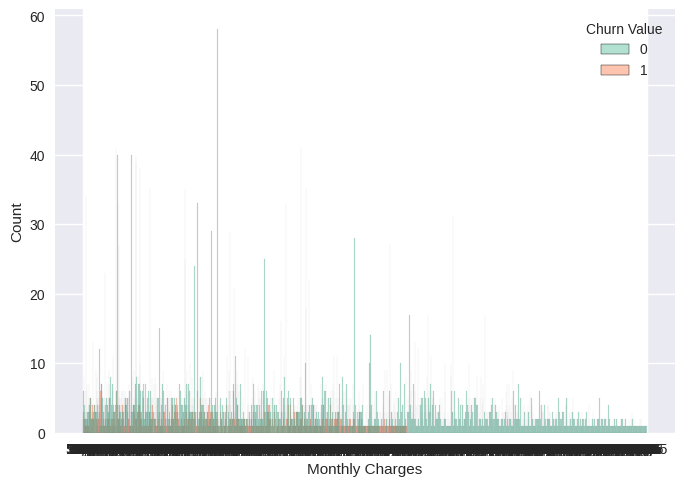

In [60]:
sns.histplot(df, x="Monthly Charges", hue="Churn Value", bins=20)
plt.show()




Valores nulos

,0
Churn Reason,5174
CustomerID,0
Count,0
State,0
Country,0
Zip Code,0
Lat Long,0
Latitude,0
City,0
Gender,0


Converter Total Charges

In [ ]:
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")


Remover linhas problemáticas

In [ ]:
# Remover linhas com problema apenas na coluna Total Charges
df = df[df["Total Charges"].notna()]



# Feature engineering e pré-processamento

Definir X e y

In [ ]:
X = df.drop([
    "CustomerID", "Churn Label", "Churn Reason",
    "Country", "State", "City", "Lat Long"
], axis=1)

y = df["Churn Value"]


Identificar colunas novamente

In [ ]:
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns


Pré-processamento

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)


Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)



# Teste de modelos e métricas

Função de métricas

In [ ]:
def avaliar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)

    if len(modelo.classes_) > 1:
        y_prob = modelo.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = np.nan

    return {
        "F1": f1_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "AUC": auc
    }


Treinar


In [ ]:
rf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(n_estimators=200, random_state=42))
])

rf.fit(X_train, y_train)
avaliar_modelo(rf, X_test, y_test)


{'F1': 1.0, 'Recall': 1.0, 'AUC': nan}

Tabela resumo

In [ ]:
resultados = pd.DataFrame({
    "Random Forest": avaliar_modelo(rf, X_test, y_test)
}).T

resultados


,F1,Recall,AUC
Random Forest,1.0,1.0,NaN
